In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.animation import FuncAnimation

import arviz as az

from cofi import BaseProblem, InversionOptions, Inversion
from cofi.utils import QuadraticReg

np.random.seed(42)

In [2]:
def rosen(x): 
    a=1.0
    b=10.0
    return (a-x[0])**2 + b*(x[1]-x[0]**2)**2

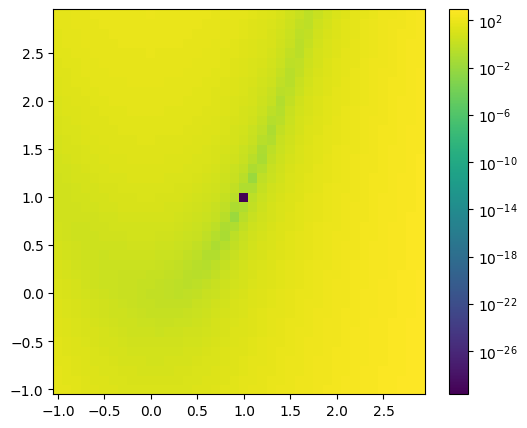

In [3]:
# Initialize figure 
fig = plt.figure(figsize=(6, 5))
ax = fig.gca()

# Evaluate function
X = np.arange(-1, 3, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen([X,Y])
im = ax.pcolor(X,Y,Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
fig.colorbar(im)

In [10]:
# Define the Base Problem
inv_problem = BaseProblem()
inv_problem.name = "Rosenbrock Function"
inv_problem.set_objective(rosen)
inv_problem.set_model_shape((2))
inv_problem.set_initial_model([0,0])

In [11]:
# Define the inverse options
inv_options = InversionOptions()
inv_options.set_tool("scipy.optimize.minimize")

# Run the inversion
inv = Inversion(inv_problem, inv_options)
inv_result = inv.run()
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 2.122385315750154e-13
jac: [ 4.49420925e-07 -2.27065373e-07]
hess_inv: [[0.49983372 0.99964203]
 [0.99964203 2.0485144 ]]
nfev: 42
njev: 14
status: 0
message: Optimization terminated successfully.
nit: 11
model: [0.99999954 0.99999907]


In [12]:
inv_problem = BaseProblem()
inv_problem.name = "Rosenbrock Function"
inv_problem.set_objective(rosen)
inv_problem.set_model_shape((2))

In [19]:
# Define the inverse options
bounds= ((-1.0,3.0),(-1.0,3.0))

inv_problem.set_bounds(bounds)

inv_options = InversionOptions()
inv_options.set_params(number_of_iterations=100)
inv_options.set_tool("cofi.border_collie_optimization")

# Run the inversion
inv = Inversion(inv_problem, inv_options)
inv_result = inv.run()

In [20]:
inv_result.model

array([0.98600155, 0.9747727 ])

In [21]:
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
 
def drawframe(i):
    ax.clear()
    # Plot that point using the x and y coordinates
    pack=inv_result.pack_position_history[i]
    flock=inv_result.flock_position_history[i]
    
    for dog in pack:
        ax.plot(dog[0],dog[1], color='red', label='original', marker='o')

    for sheep in flock:
        ax.plot(sheep[0],sheep[1], color='blue', label='original', marker='o')
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-1, 3])
    ax.set_ylim([-1, 3])
anim = FuncAnimation(fig, drawframe, frames=99,
                    interval=500, repeat=False)
plt.close()

In [22]:
from IPython.display import HTML
HTML(anim.to_html5_video())